# Bayes theorem

Naive bayes classifiers are purely based on bayes theorem and without understanding it, we cannot proceed further. So let's first discuss about bayes theorem.

The formula for Baye's theorem is,

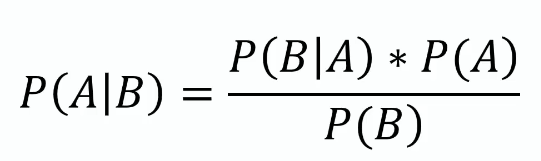

P(A|B) is called **posterior probability** and we call it as probability of A given B. It means, the probability of event A occuring **given that** B already had occured. The **vertical pipe symbol** | is referred here as 'given that'-meaning conditional probability.

and P(A) is called **prior probability**. which means with initial information, the probability of event of that item.

Now, the scope of explaining the bayes theorem is very limited here as it needs some mathematical illustration and computations. Moreover our focus is just to understand Naive bayes algorithm. 

# Naive Bayes Intuition

Ok. So we have got age in x-axis and salary in y-axis. we have 2 classes of data points in our dataset.
Red class - person who walks to office
Green class - person who drives to office

Now, the **question is, if a new observation or a datapoint is added somewhere in our plot/chart, which class will be assigned to it. Is it a green class who drives to office or the red class who walks to office.**

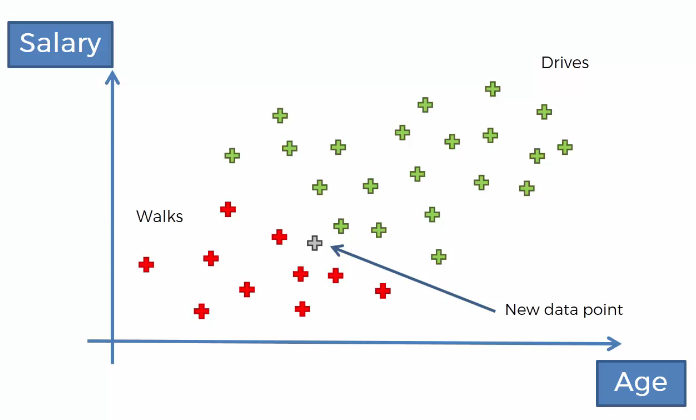

**Plan of attack** We will examine this with 3 steps.

**Step1:** P(Walks|X) = (P(X|Walks) * P(Walks)) / P(X)

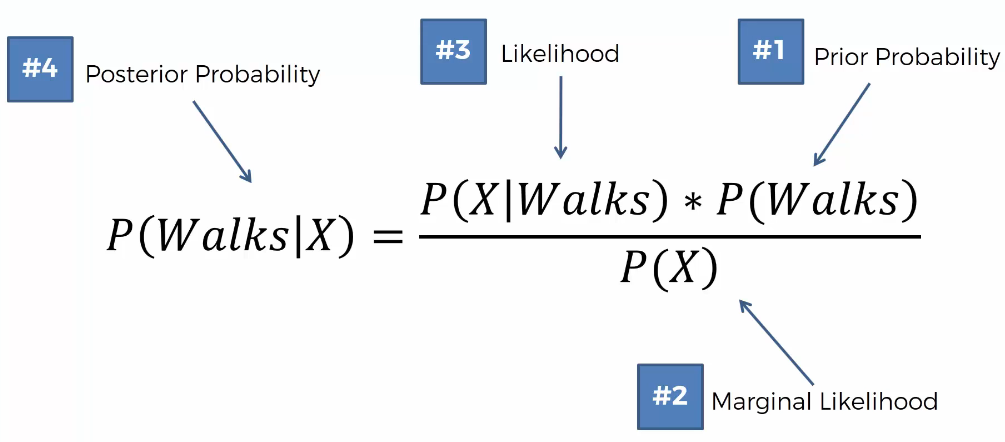

Basically, we are finding the probability of a person who walks **given that** the features. The features are nothing but some age and salary.

As such in diagram we will first calculate -->**P(Walks)**

a. P(Walks) is nothing but total no. of **walk class** divided by total no. of datapoints.
    P(Walks) = No. of walkers/Total observations. We have, 10 walks (red class) and 30 total datapoints.
    So, P(Walks) = 10/30
    
b. Next -->P(X)
    P(X) - It is nothing but the probability of a randomly selected point is deemed to be similar to the data point that we are trying to add. To calculate this, we will first draw a circle around our new observation with some radius. This is purely of individual choice. We can take any radius and draw a circle. Now, remove the new observation. Count the total no. of classes inside the circle. The classes includes both red and green classes but within the circle. For me it's 4. So, 4/30 is the P(X). All of the points inside the circle are **deemed to be similar interms of features to the data point that we are adding**
    
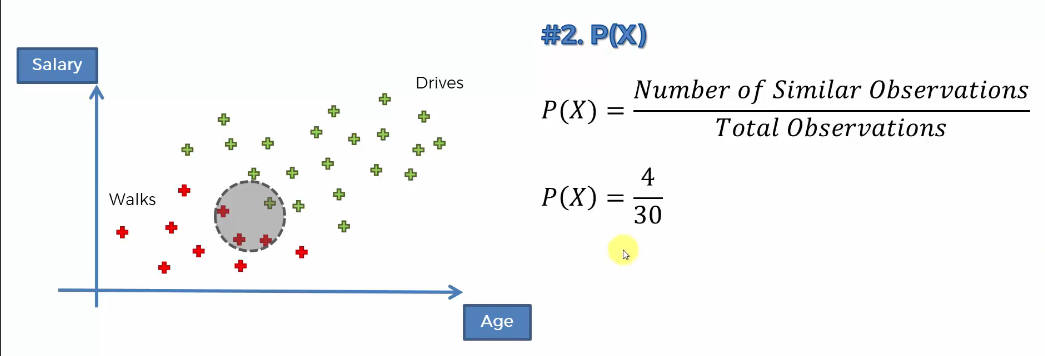

c. Next -->**P(X|Walks)**
    What is the likehood that somebody who walks exhibits feature X. Once again we use the same circle for this calculation. So, anything rhat falls inside this circle is deemed to be similar to the point that we are adding.
The **question is what is the probability that the randomly selected data point from our dataset will be similar to the datapoint that we are adding**. So basically, **what is the likelihood that the randomly selected datapoint from this circle given that the person walks**. 
**Answer -** Since we are working only with **someone who walks** we **count the no. of red points** and divide it by **total no. of red points**. In my case it's just 3. So 3/10.

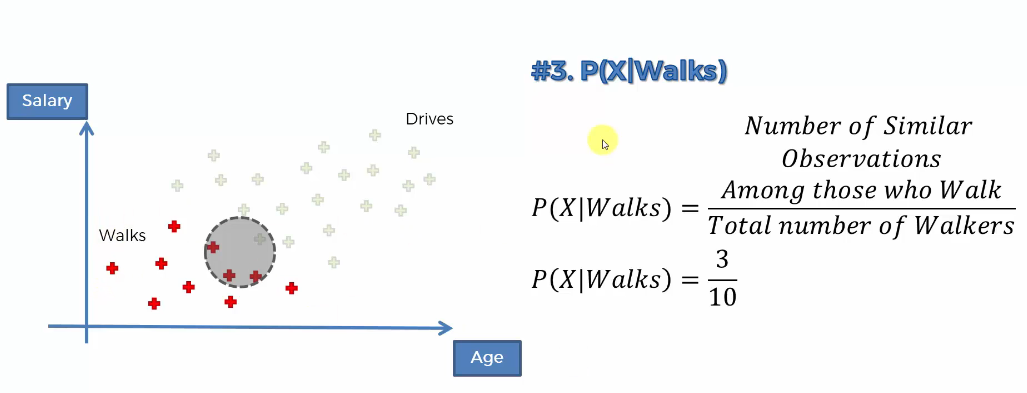

Finally, we plug this in our formula and we get **0.75 or the 75%**

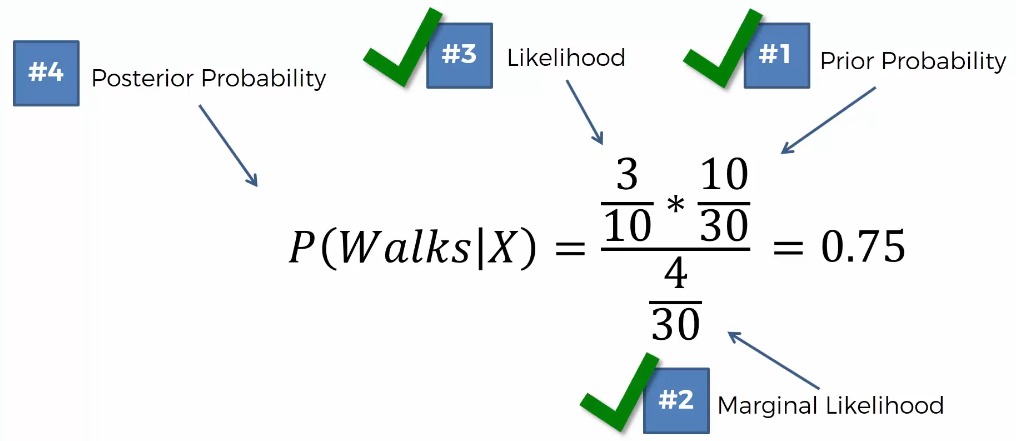

**Step2:** P(Drives|X) = (P(X|Drives) * P(Drives)) / P(X)

**We follow same above steps of a,b and c to calculate the probability of people who drives and got the below result as 0.25

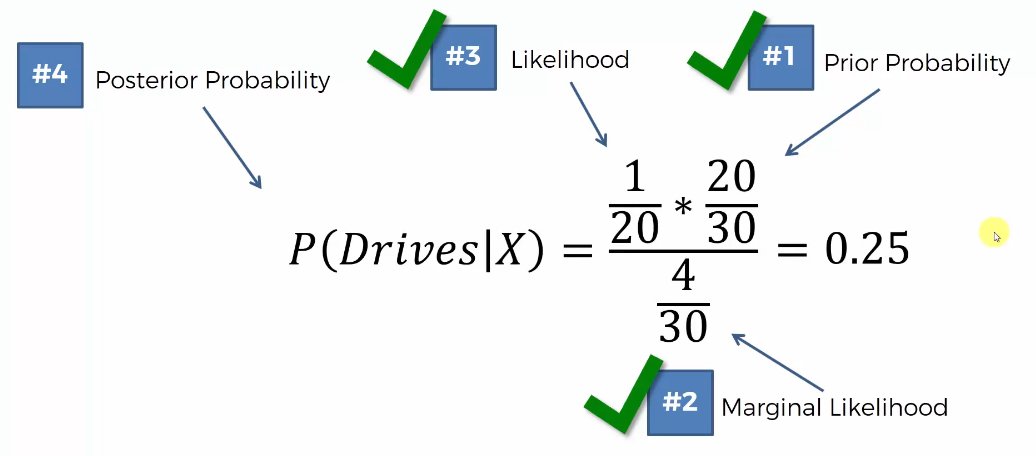

**Step3:** P(Walks|X) vs (P(Drives|X)

    0.75 vs. 0.25
   
    So, since the 0.75 is greater **we assign the class as red or the person walks for the new observation**
    
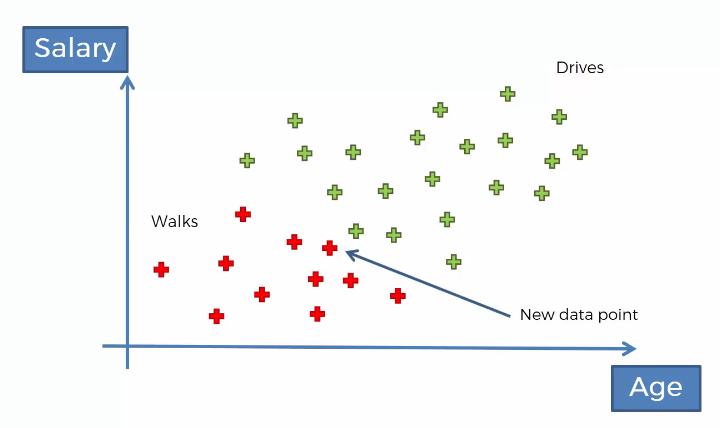

# Extra details of Naive bayes classifier

So let's end up with 3 questions of

1. Why 'Naive' bayes? what made to call it as 'naive'?
    This is because bayes theorem requires some **independent observations** and the bayes theorem is the foundation of naive bayes ML algorithm. And these naive bayes algorithms are often relies on these assumptions which are not correct. And therefore it's kind of 'naive' to assume that they are correct. If you could see in our example, we had age in x-axis and salary in y-axis. Truely, these two variables are dependent on each other. As the age grows, the salary also grows. But the way we worked with bayes theorem is actually both are independent and that's like the fundamental assumptions. We apply bayes theorem to machine learning and that's why it's called as naive bayes although the variables are not completely independent and it's still applied and it gives good result. And that's why it's called naive because it's naive assumption.
    
2. P(X) - 
    The interesting fact while calculating P(X) in both step1 and step2 are same. So, we can avoid duplication of calcuating the P(X) one more time. where P(X) is 
    No. of similar observations/Total observations.
    
3. What if we have more than 2 classes?
    Remember we have 2 classes - walk to work and drives to work. What if we have more classes like department etc..
    Then we need to calculate the probability of that class as well and compare with all other results of probabilities.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv('/kaggle/input/socio-network/Social_Network_Ads.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Taking care of missing values

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

# Splitting dataset into training set and test set

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training the Naive Bayes Classifier onto the dataset

In [6]:
"""Let's import the GaussianNB class from naive_bayes module of sklearn library. GaussianNB is the classic one from
other class available."""

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

# Predicting a new test set

In [7]:
"""Predicting the particular test set result from our dataset"""
classifier.predict([[30,87000]])

array([1])

# Predicting the test set

In [8]:
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1,

# Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[48  3]
 [ 4 25]]


0.9125

# Visualizing the Naive Bayes result

/tmp/ipykernel_18/1860186656.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


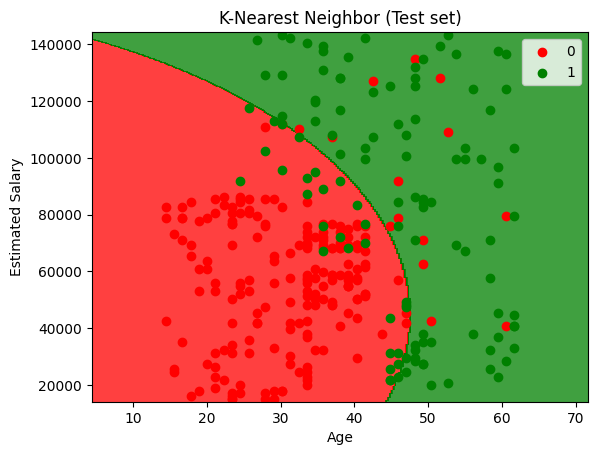

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbor (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()